In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

<Figure size 800x500 with 0 Axes>

In [3]:
df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

df1.head()
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
# Remove extra spaces from column names
df1.columns = df1.columns.str.strip()

# Drop missing values
df1 = df1.dropna()

# Convert Date column
df1['Date'] = pd.to_datetime(df1['Date'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


/tmp/ipython-input-3601918898.py:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [5]:
df2.columns = df2.columns.str.strip()

df2 = df2.dropna()

df2['Date'] = pd.to_datetime(df2['Date'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

/tmp/ipython-input-93223894.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'])


In [9]:
df1 = df1.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

df2 = df2.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

In [11]:
combined_df = pd.concat([df1, df2])

# Remove duplicates
combined_df = combined_df.drop_duplicates()

combined_df.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,Region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN


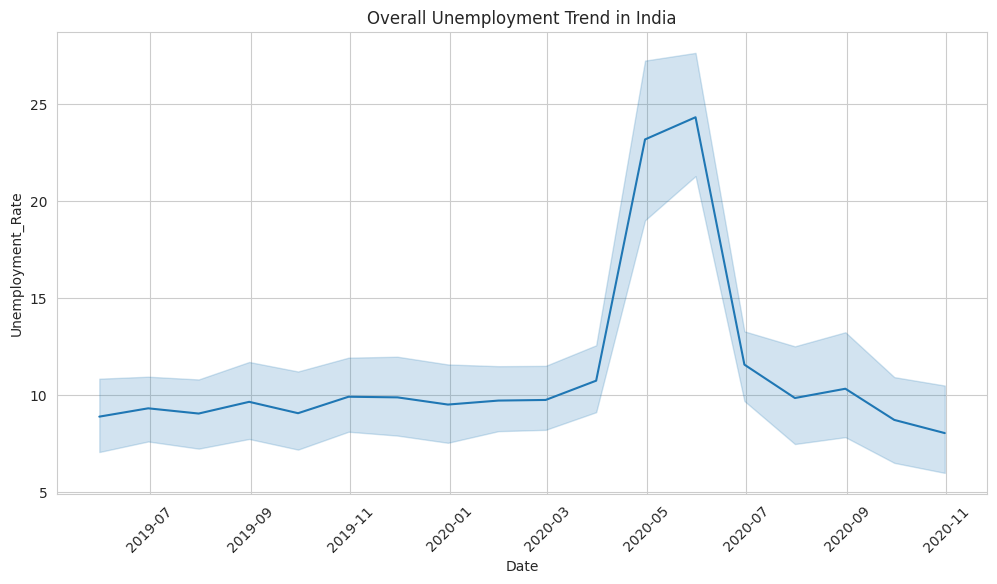

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=combined_df)
plt.title("Overall Unemployment Trend in India")
plt.xticks(rotation=45)
plt.show()

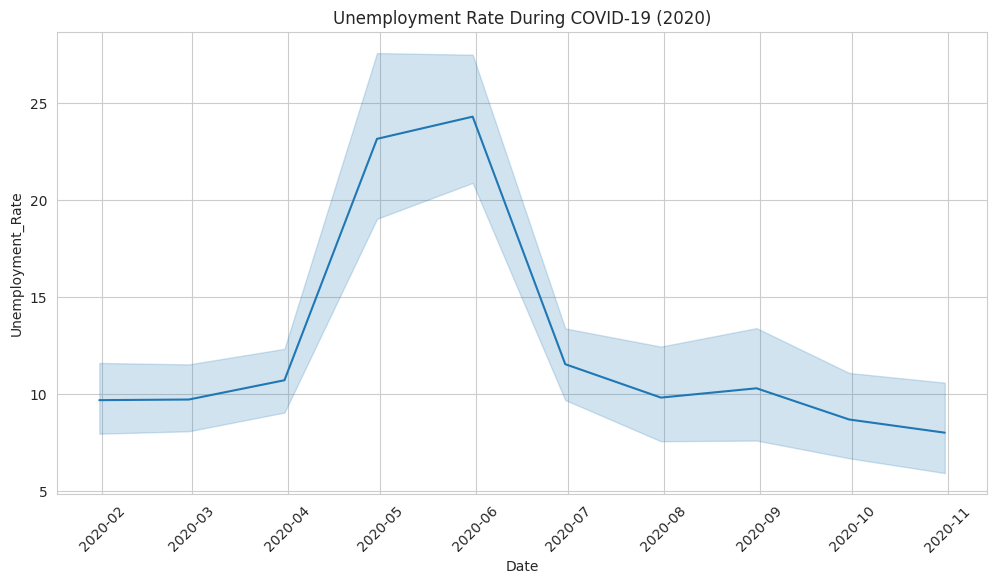

In [13]:
covid_df = combined_df[combined_df['Date'].dt.year == 2020]

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=covid_df)
plt.title("Unemployment Rate During COVID-19 (2020)")
plt.xticks(rotation=45)
plt.show()

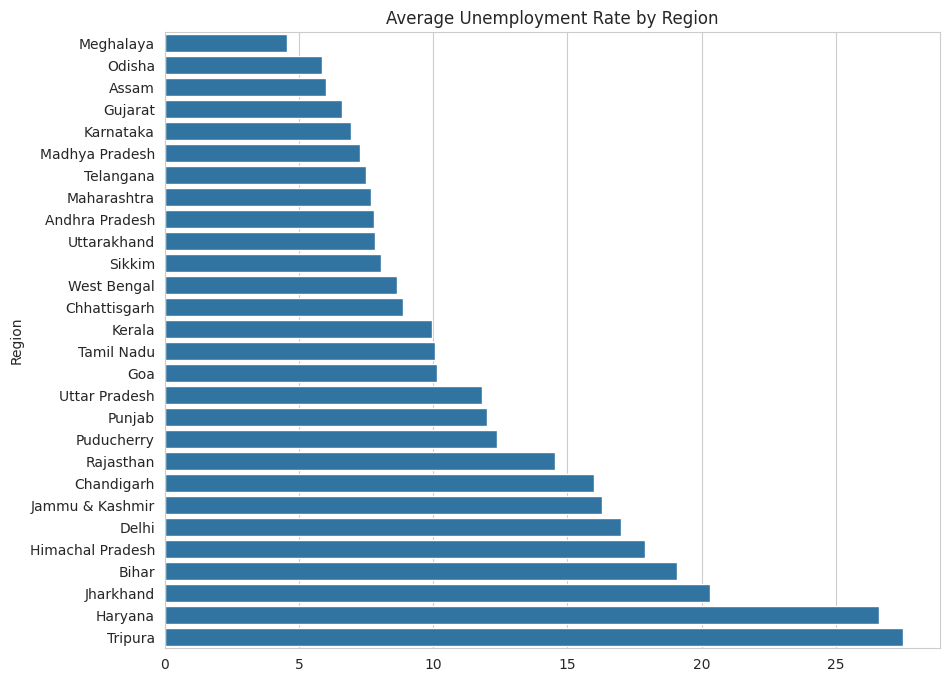

In [14]:
region_avg = combined_df.groupby('Region')['Unemployment_Rate'].mean().sort_values()

plt.figure(figsize=(10,8))
sns.barplot(x=region_avg.values, y=region_avg.index)
plt.title("Average Unemployment Rate by Region")
plt.show()

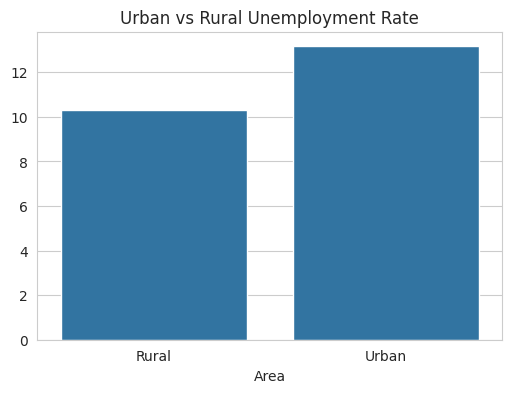

In [15]:
area_avg = combined_df.groupby('Area')['Unemployment_Rate'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=area_avg.index, y=area_avg.values)
plt.title("Urban vs Rural Unemployment Rate")
plt.show()

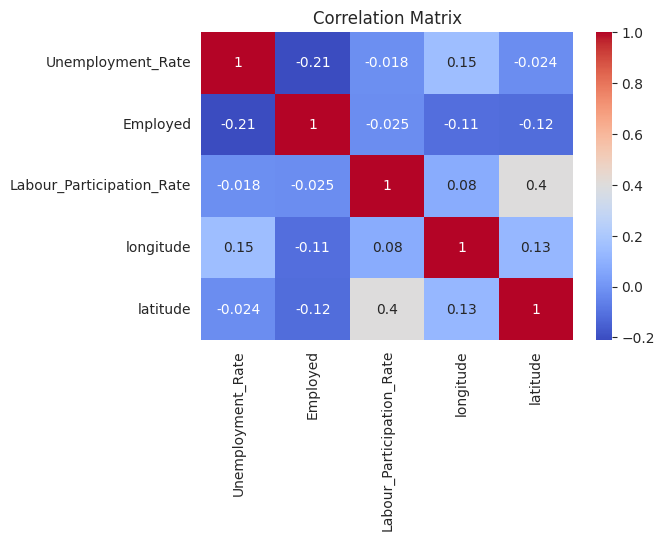

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(combined_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
print("Unique regions in df1:", df1['Region'].unique())
print("Unique regions in df2:", df2['Region'].unique())

Unique regions in df1: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
Unique regions in df2: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [8]:
pip install pandas